In [104]:
%matplotlib inline
import os,sys
import matplotlib
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import sfdmap
import extinction
from astropy import units as u
import math
import pylatex
from matplotlib.gridspec import GridSpec

# pyqsofit
from scipy import interpolate

# for SDSS SQL queries
import mechanize
from io import BytesIO

import glob,timeit

#sys.path.append('/Users/runnojc1/Software/py/pyspeckit')
import pyspeckit
from pyspeckit.spectrum.models.inherited_gaussfitter import gaussian
from pyspeckit.specwarnings import PyspeckitWarning
from astropy.table import Table
from scipy.interpolate import interp1d

# Data

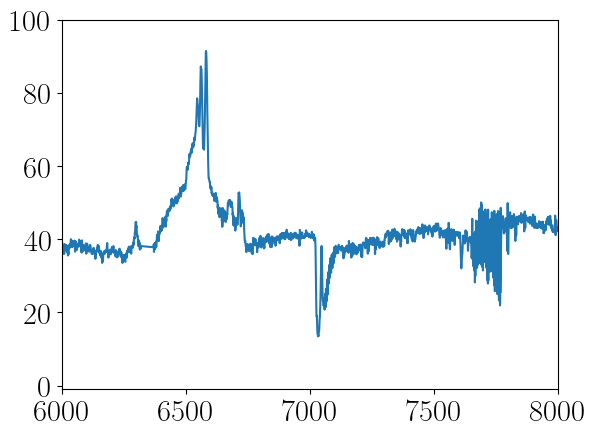

In [105]:
file_path = 'HET/combined_spectrum_20230113_0000022_exp01.fits'

t = Table.read(file_path)
t.sort('Wavelength')

z = 0.081
wl = t['Wavelength']/(1+z)
flux = t['F_lambda'] * (10**17)
err = t['e_F_lambda']

flux_lim = np.where(flux>0)[0]
wl=wl[flux_lim]
flux=flux[flux_lim]
err=err[flux_lim]

#wl_lim = np.where((wl>5900)&(wl<6950))
#wl=wl[wl_lim]
#flux=flux[wl_lim]
#err=err[wl_lim]

mask1 = np.where((wl<6320)|(wl>6370))
wl=wl[mask1]
flux=flux[mask1]
err=err[mask1]

plt.plot(wl, flux)
plt.xlim(6000, 8000)
plt.ylim(-1, 100)
plt.show()

# Correction

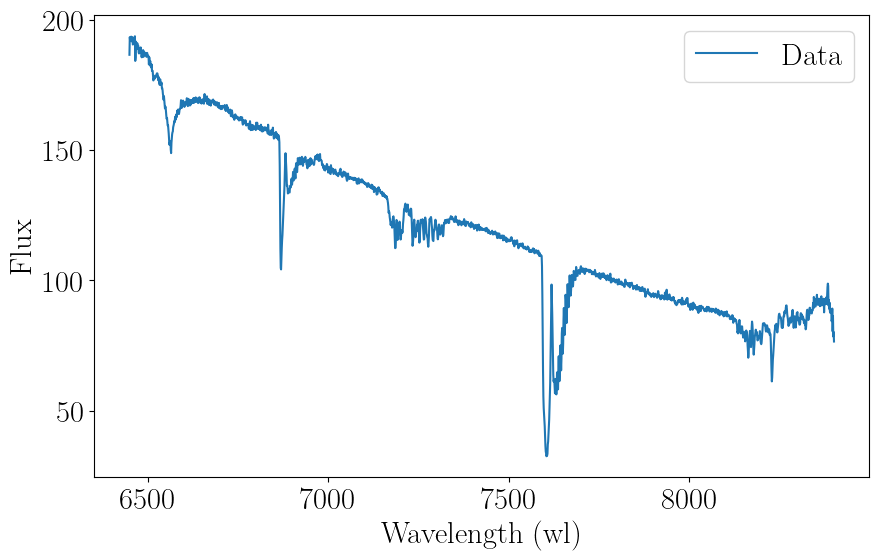

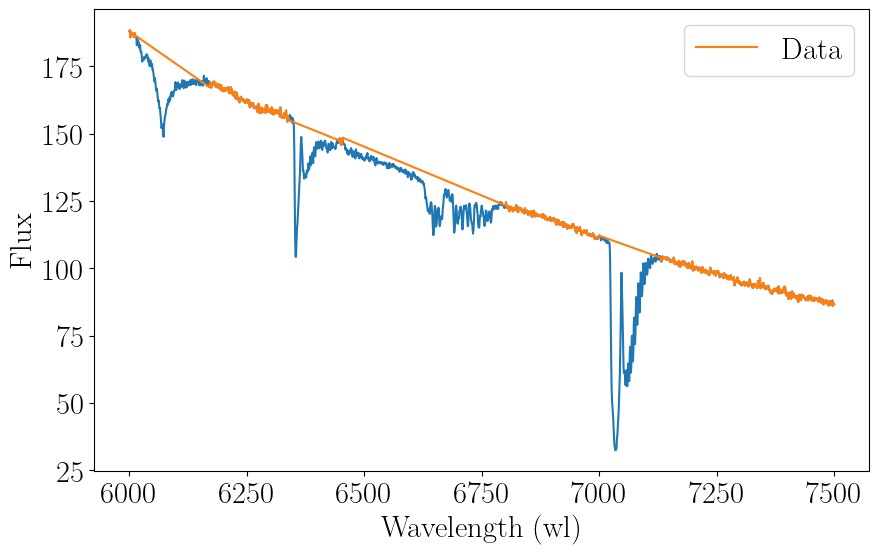

In [106]:
#file_name = 'bundle_20230529_standards/combined_spectrum_20230112_0000009_exp01.fits'
file_name = 'bundle_20230529_standards/spectrum_20230112_0000010_exp01_red.fits'
hdul = fits.open(file_name)
data = hdul[0].data
hdr = hdul[0].header

z = 0.081

wl = data[0]
wl = wl
flux = data[1] *(10**16)
err = data[2]

plt.figure(figsize=(10, 6))
plt.plot(wl, flux, label='Data')  # Original data


#plt.plot(wl_fit, flux_fit-flux_o, label='Best fit curve')  # Fitted curve
plt.xlabel('Wavelength (wl)')
plt.ylabel('Flux')
plt.legend()
plt.show()

wl = wl/(1+z)
mask0 = np.where((wl>6000) & (wl < 7500)) 
wl_o = wl[mask0]
flux_o = flux[mask0]
err_o = err[mask0]

mask1 = np.where((wl_o < 6015) | (wl_o > 6170)) 
wl = wl_o[mask1]
flux = flux_o[mask1]
err = err_o[mask1]

mask2 = np.where((wl < 6340) | (wl > 6445)) 
wl = wl[mask2]
flux = flux[mask2]
err = err[mask2]

mask3 = np.where((wl < 6455) | (wl > 6800)) 
wl = wl[mask3]
flux = flux[mask3]
err = err[mask3]


mask4 = np.where((wl < 7000) | (wl > 7130)) 
wl = wl[mask4]
flux = flux[mask4]
err = err[mask4]

plt.figure(figsize=(10, 6))
plt.plot(wl_o, flux_o)
plt.plot(wl, flux, label='Data')  # Original data

#plt.axvline(x=6445)
#plt.axvline(x=6455)

#plt.plot(wl_fit, flux_fit-flux_o, label='Best fit curve')  # Fitted curve
plt.xlabel('Wavelength (wl)')
plt.ylabel('Flux')
plt.legend()
plt.show()

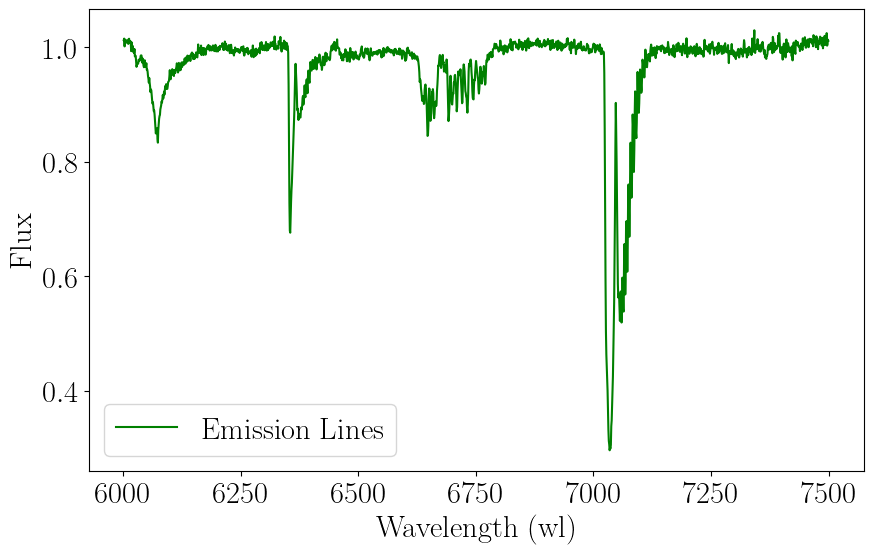

In [107]:
degree = 3

coefficients = np.polyfit(wl, flux, degree)
polynomial_continuum = np.poly1d(coefficients)(wl_o)
standard_flux = flux_o / polynomial_continuum
standard_wl = wl_o


plt.figure(figsize=(10, 6))
#plt.plot(wl_o, flux_o, label='Original Flux Data')
#plt.plot(wl_o, polynomial_continuum, label='Polynomial Continuum', color='orange')
plt.plot(standard_wl, standard_flux, label='Emission Lines', color='green')
plt.xlabel('Wavelength (wl)')
plt.ylabel('Flux')
#plt.ylim(0, 4)
plt.legend()
plt.show()

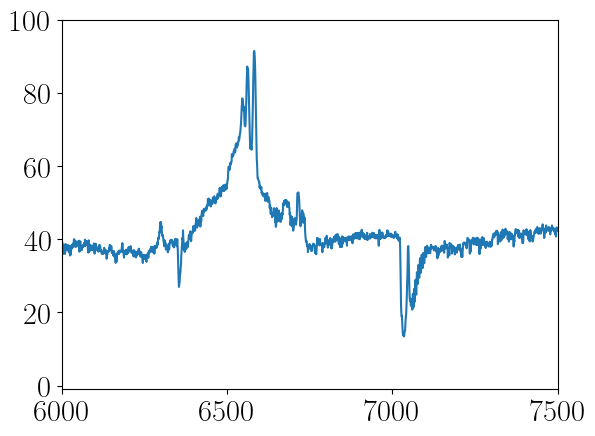

1715


In [108]:
file_path = 'HET/combined_spectrum_20230113_0000022_exp01.fits'

t = Table.read(file_path)
t.sort('Wavelength')

z = 0.081
wl = t['Wavelength']/(1+z)
flux = t['F_lambda'] * (10**17)
err = t['e_F_lambda'] * (10**17)

flux_lim = np.where(flux>0)[0]
source_wl=wl[flux_lim]
source_flux=flux[flux_lim]
source_err=err[flux_lim]

wl_lim = np.where((source_wl>6000)&(source_wl<7500))
source_wl=source_wl[wl_lim]
source_flux=source_flux[wl_lim]
source_err=source_err[wl_lim]


plt.plot(source_wl, source_flux)
plt.xlim(6000, 7500)
plt.ylim(-1, 100)
plt.show()

print(len(source_flux))

In [ ]:
# File path and opening FITS file
file_path = 'bundle_20230529_standards/spectrum_20230112_0000010_exp01_red.fits'
fits_data = fits.open(file_path)
spectrum_data = fits_data[0].data

# Extracting data from the FITS file
redshift = 0.081
wavelengths = spectrum_data[0] / (1 + redshift)  # Applying redshift correction
fluxes = spectrum_data[1] * (10**16)  # Scaling the flux
errors = spectrum_data[2]  # Errors

# Masks to filter wavelength ranges
full_range_mask = np.where((wavelengths > 6000) & (wavelengths < 7500))
selected_wavelengths = wavelengths[full_range_mask]
selected_fluxes = fluxes[full_range_mask]
selected_errors = errors[full_range_mask]

# Further filtering to clean up the data
exclusion_ranges = [
    (6015, 6170),
    (6340, 6445),
    (6455, 6800),
    (7000, 7130)
]

for lower, upper in exclusion_ranges:
    mask = np.where((selected_wavelengths < lower) | (selected_wavelengths > upper))
    selected_wavelengths = selected_wavelengths[mask]
    selected_fluxes = selected_fluxes[mask]
    selected_errors = selected_errors[mask]

# Plotting the filtered and original data
plt.figure(figsize=(10, 6))
plt.plot(wavelengths[full_range_mask], fluxes[full_range_mask], label='Atmospheric Absorption', color='grey')
plt.plot(selected_wavelengths, selected_fluxes, label='Continuum', color='black')
plt.xlabel('Observed Wavelength (\AA)')
plt.ylabel('$f_{\lambda}$ (10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend()
plt.tight_layout()
plt.savefig("standard_spectra.pdf", format='pdf', dpi=300)
plt.show()


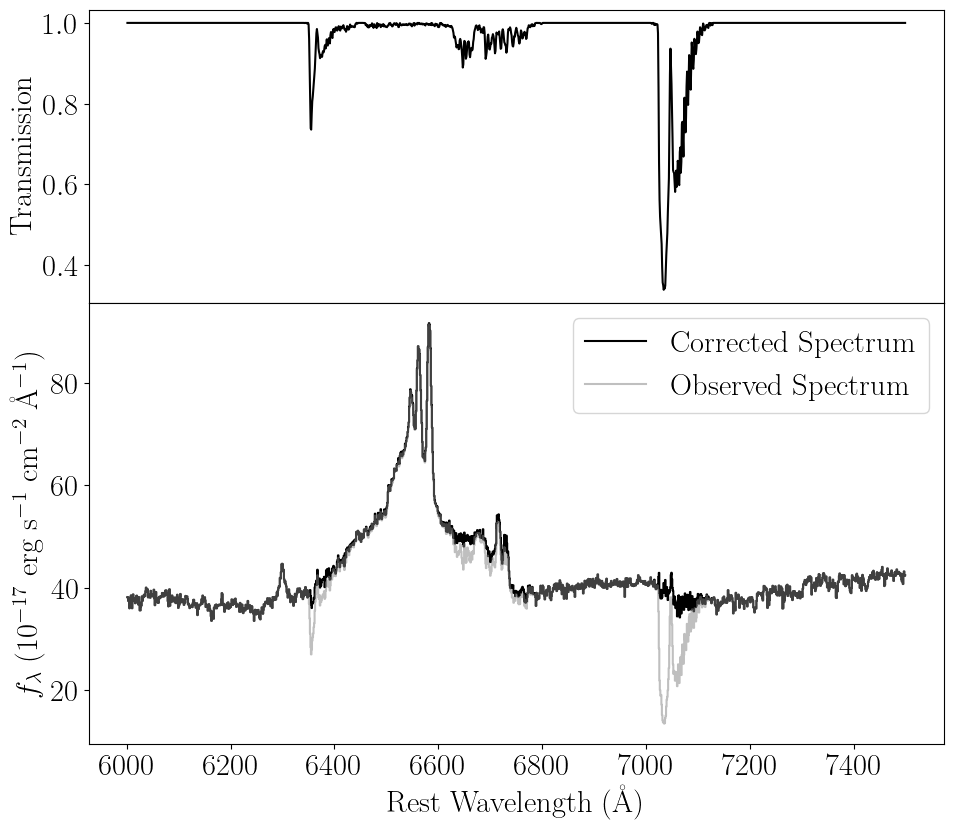

In [109]:
shift = 0
scale = 1.18

tmp = standard_flux

standard_wl = standard_wl + shift
tmp = (1-(1-tmp)**scale)
inf = np.where(np.isfinite(tmp) == False)[0]

standard_flux[inf] = 1
standard_flux = (1-(1-standard_flux)**scale)

mask1 = np.where(standard_wl < 6340)[0]
mask2 = np.where((standard_wl > 6445) & (standard_wl < 6455))[0]
mask3 = np.where((standard_wl > 6800) & (standard_wl < 7010))[0]
mask4 = np.where(standard_wl > 7130)[0]

standard_flux[mask1] = 1
standard_flux[mask2] = 1
standard_flux[mask3] = 1
standard_flux[mask4] = 1



bin_size = 1
bins = np.arange(start=min(np.min(source_wl), np.min(standard_wl)), stop=max(np.max(source_wl), np.max(standard_wl)) + bin_size, step=bin_size)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
wavelength = bin_centers


indices1 = np.digitize(source_wl, bins) - 1
indices2 = np.digitize(standard_wl, bins) - 1
source_flux = np.array([np.mean(source_flux[indices1 == i]) for i in range(len(bin_centers))])
standard_flux = np.array([np.mean(standard_flux[indices2 == i]) for i in range(len(bin_centers))])
binned_err = np.array([np.mean(source_err[indices1 == i]) for i in range(len(bin_centers))])



plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 22
})

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 1, height_ratios=[2, 3, 0], hspace=0)

ax1 = fig.add_subplot(gs[0]) 
ax2 = fig.add_subplot(gs[1])  
# Plotting on the first axis
ax1.plot(wavelength, standard_flux, color='black')
ax1.set_ylabel('Transmission')
ax1.tick_params(labelbottom=False) 

# Plotting on the second axis
ax2.plot(wavelength, source_flux / standard_flux, color='black', label='Corrected Spectrum', drawstyle='steps-mid')
ax2.plot(wavelength, source_flux, color='grey', label='Observed Spectrum', drawstyle='steps-mid', alpha=0.5)
ax2.set_xlabel('Rest Wavelength (\AA)')
ax2.set_ylabel("$f_{\lambda}$ (10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)")
ax2.legend()

plt.tight_layout()
plt.savefig("spectrum_correction.pdf", format='pdf', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


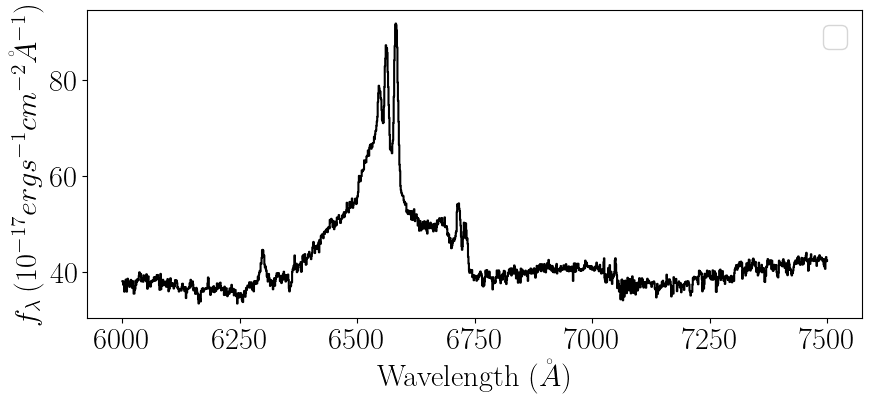

In [110]:
corrected_flux = source_flux / standard_flux
corrected_wl = bin_centers


plt.figure(figsize=(10, 4))
plt.plot(wavelength, corrected_flux, color="black", drawstyle='steps-mid')
#plt.axvline(x=6564.93, color='r', linestyle='--', linewidth=1, label="Halpha")
#plt.axvline(x=6085.90, color='orange', linestyle='--', linewidth=1, label="FVII")
#plt.axvline(x=6551.06, color='g', linestyle='--', linewidth=1, label="NII")
#plt.axvline(x=6585.64, color='g', linestyle='--', linewidth=1, label="NII")
#plt.axvline(x=6370, color='b', linestyle='--', linewidth=1, label="OI")
#plt.axvline(x=6303, color='b', linestyle='--', linewidth=1, label="OI")
#plt.axvline(x=6719, color='y', linestyle='--', linewidth=1, label="SII")
#plt.axvline(x=6734, color='y', linestyle='--', linewidth=1, label="SII")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel("$f_{\lambda} \: (10^{-17} erg s^{-1} cm^{-2} \AA^{-1})$")
plt.legend()
plt.show()



## Functions

In [8]:
def kms_to_ang(dv,w0):
    """
    Convert a width in km/s to A.
    """
    c = 2.99792458e5 # km/s
    dlam = (dv/c)*w0
    return dlam

In [ ]:
def powerlaw(x, scale, power):
    """
    Defines a power law

    Returns
    -------
    scale * x**power
    """
    return scale*(x/1000.)**-power

In [ ]:
def gaussian(xarr,amplitude,cent,fwhm,normalized=False,return_components=False,return_hyperfine_components=False):
    """
    Returns a 1-dimensional gaussian of form
    A*np.exp(-(x-dx)**2/(2*w**2))

    Area is sqrt(2*pi*sigma^2)*amplitude - i.e., this is NOT a normalized
    gaussian, unless normalized=True in which case A = Area
    
    Parameters
    ----------
    xarr : np.ndarray
        array of x values
    amplitude : float
        Amplitude of the Gaussian, i.e. its peak value, unless
        normalized=True then A is the area of the gaussian
    cent : float
        Center or "shift" of the gaussian same units as xarr
    fwhm : float
        Full width at half maximum of the Gaussian in km/s
    return_components : bool
        dummy variable; return_components does nothing but is required by all
        fitters
    return_hyperfine_components : bool
        dummy variable; does nothing but is required by all
        fitters
    normalized : bool
        Return a normalized Gaussian?
    """ 
    fwhm = kms_to_ang(fwhm,cent)
    if fwhm == 0:
        return np.nan
    elif fwhm < 0:
        warnings.warn("Negative width in Gaussian: {0}.".format(fwhm),
                      PyspeckitWarning)

    width = fwhm/np.sqrt(8*np.log(2))
    xarr = np.array(xarr) # make sure xarr is no longer a spectroscopic axis
    model = amplitude*np.exp(-(xarr-cent)**2/(2.0*width**2))
    if normalized:
        return model / (np.sqrt(2*np.pi) * width**2)
    else:
        return model

In [ ]:
def optical_agn_spectrum(wave_to_fit,pl_s,pl_e,\
                         sii1_f,sii1_cent,sii1_fwhm,\
                         sii2_f,sii2_cent,sii2_fwhm,\
                         oi1_f,oi1_cent,oi1_fwhm,\
                         oi2_f,oi2_cent,oi2_fwhm,\
                         fevii_f,fevii_cent,fevii_fwhm,\
                         nii1_f,nii1_cent,nii1_fwhm,\
                         nii2_f,nii2_cent,nii2_fwhm,\
                         halpha1_f,halpha1_cent,halpha1_fwhm,\
                         halpha2_f,halpha2_cent,halpha2_fwhm,\
                         halpha3_f,halpha3_cent,halpha3_fwhm,\
                         halpha4_f,halpha4_cent,halpha4_fwhm,\
                         return_components=False,return_hyperfine_components=False):
    """
    Calculates a full optical AGN spectral model.
    """
    
    #x = wave_to_fit.to_value()
    x = np.array(wave_to_fit)
    y = np.zeros_like(x)
    
    # powerlaw
    pl = powerlaw(x,pl_s,pl_e)      

    # broad [S II] - 6718.85 & 6733.72
    sii1 = gaussian(x,sii1_f,sii1_cent,sii1_fwhm,normalized=False)
    sii2 = gaussian(x,sii2_f,sii2_cent,sii2_fwhm,normalized=False)
    
    oi1 = gaussian(x,oi1_f,oi1_cent,oi1_fwhm,normalized=False)
    oi2 = gaussian(x,oi2_f,oi2_cent,oi2_fwhm,normalized=False)
    
    fevii = gaussian(x,fevii_f,fevii_cent,fevii_fwhm,normalized=False)
    
    nii1 = gaussian(x,nii1_f,nii1_cent,nii1_fwhm,normalized=False)
    nii2 = gaussian(x,nii2_f,nii2_cent,nii2_fwhm,normalized=False)
    
    # narrow and broad halpha line
    halpha1 = gaussian(x,halpha1_f,halpha1_cent,halpha1_fwhm,normalized=False)
    halpha2 = gaussian(x,halpha2_f,halpha2_cent,halpha2_fwhm,normalized=False)
    halpha3 = gaussian(x,halpha3_f,halpha3_cent,halpha3_fwhm,normalized=False)
    halpha4 = gaussian(x,halpha4_f,halpha4_cent,halpha4_fwhm,normalized=False)

    y = pl + sii1 + sii2 + halpha1 + halpha2 + halpha3 + halpha4 + nii1 + nii2 + oi1 + oi2 + fevii
    
    if return_components:
        y = {'model':y,\
             'pl':pl,\
            'sii1':sii1,\
             'sii2':sii2,\
             'oi1':oi1,\
             'oi2':oi2,\
             'fevii':fevii,\
             'nii1':nii1,\
            'nii2':nii2,\
            'halpha1':halpha1,\
            'halpha2':halpha2,\
            'halpha3':halpha3,\
            'halpha4':halpha4} 
    
    return y

In [ ]:
def pl_fitter(order=1):
    """
    Generator for powerlaw fitter class
    """

    myclass =  pyspeckit.models.model.SpectralModel(plaw, 2,
            parnames=['scale','power'], 
            parlimited=[(False,False),(False,False)], 
            parlimits=[(0,0),(0,0)], 
            shortvarnames=('S','P')
            )
    myclass.__name__ = "pl"
    
    return myclass

In [ ]:
def template_fitter(wave,templates,scale_factor,index,shift):
    '''
    given a series of templates (like stellar models by age or Fe II templates by convolution width),
    returns a spectrum interpolated between template spectra and scaled.
    Spectrum is also interpolated onto the wavelength vector of the observed data.
    
    params:
        wave - wavelength vector of observed data
        templates - 2D numpy array of shape (numpoints,num_templates+1), where 1st column is wavelength, subsequent columns are templates
        index - selected index within templates [0-num_templates]. Float, will interpolate between templates when index!=int
        scale_factor - multiplicative scale factor for spectrum
    '''
    num_templates=templates.shape[1]-1
    numpoints=templates.shape[0]
    
    if shift>=0:
        wave_temp=templates[:,0]*(1+shift)
    else:
        wave_temp=templates[:,0]/(1+shift)
    flux_temp=templates[:,1:]
    
    # Perform interpolation between templates
    if index==num_templates-1:
        spectrum=templates[:,-1]
    else:
        lower_idx=int(math.floor(index)+1) #+1 because 0th index is wavelength column
        lower_spectrum=templates[:,lower_idx] # this means lower in index, not necessarily in flux
        
        upper_idx=lower_idx+1
        upper_spectrum=templates[:,upper_idx]
        
        weight=(index+1)-lower_idx #1=choose upper spectrum value, 0=choose lower spectrum value, 0.5=choose midpoint
        
        distances=upper_spectrum-lower_spectrum # array of distances between selected spectra
        
        spectrum=lower_spectrum+(weight*distances)
        
    # Perform scaling
    scaled_spectrum=spectrum*scale_factor
    
    # interpolate spectrum onto wavelength vector of data
    final_spectrum=np.interp(wave,wave_temp,scaled_spectrum)

    return final_spectrum

In [ ]:
def optical_agn_fitter(order=1):
    """
    Generator for powerlaw fitter class
    """

    myclass =  pyspeckit.models.model.SpectralModel(optical_agn_spectrum, 35,
            parnames=['pl_s','pl_e',\
                     'sii1_f','sii1_cent','sii1_fwhm',\
                      'sii2_f','sii2_cent','sii2_fwhm',\
                      'oi1_f','oi1_cent','oi1_fwhm',\
                      'oi2_f','oi2_cent','oi2_fwhm',\
                      'fevii_f','fevii_cent','fevii_fwhm',\
                      'nii1_f','nii1_cent','nii1_fwhm',\
                     'nii2_f','nii2_cent','nii2_fwhm',\
                     'halpha1_f','halpha1_cent','halpha1_fwhm',\
                     'haplha2_f','halpha2_cent','halpha2_fwhm',\
                     'haplha3_f','halpha3_cent','halpha3_fwhm',\
                     'haplha4_f','halpha4_cent','halpha4_fwhm'], 
            parlimited=[(False,False),(False,False),\
                       (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                       (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                       (False,False),(False,False),(False,False),\
                        (False,False),(False,False),(False,False),\
                       (False,False),(False,False),(False,False),\
                       (False,False),(False,False),(False,False),], 
            parlimits=[(0,0),(0,0),\
                      (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                      (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                       (0,0),(0,0),(0,0),\
                      (0,0),(0,0),(0,0),\
                      (0,0),(0,0),(0,0),\
                      (0,0),(0,0),(0,0)]
            )
    myclass.__name__ = "optagn"
    
    return myclass

In [93]:
def plot_optical_agn_fit(wave,flux,model,wavemin,wavemax,ymin,ymax,xlabel,ylabel,plotfile,HARDCOPY=False,SHOW=True):
    
    sii1 = model['sii1']
    sii2 = model['sii2']
    oi1 = model['oi1']
    oi2 = model['oi2']
    fevii = model['fevii']
    halpha1 = model['halpha1']
    halpha2 = model['halpha2']
    halpha3 = model['halpha3']
    halpha4 = model['halpha4']
    nii1 = model['nii1'] 
    nii2 = model['nii2']
    
    
    fig = plt.figure(figsize=(18, 6))
    ax  = plt.axes()
    ax.plot(wave,flux,drawstyle='steps-mid',color='black')
    ax.plot(wave,model['model'],color=pink,lw=2)
    ax.plot(wave,model['pl'],color=royal_blue)
    ax.plot(wave,sii1,color=salmon)
    ax.plot(wave,sii2,color=salmon)
    ax.plot(wave,oi1,color=salmon)
    ax.plot(wave,oi2,color=salmon)
    ax.plot(wave,fevii,color=turquoise)
    ax.plot(wave,halpha1,color=salmon)
    ax.plot(wave,halpha2,color=turquoise)
    ax.plot(wave,halpha3,color=turquoise)
    ax.plot(wave,halpha4,color=turquoise)
    ax.plot(wave,nii1,color=salmon)
    ax.plot(wave,nii2,color=salmon)
    ax.set_xlim(wavemin,wavemax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel(xlabel,size=24)
    ax.set_ylabel(ylabel,size=24)
    plt.tight_layout()
    if HARDCOPY: fig.savefig(plotfile+'_fullfit.pdf', format='pdf')
    if SHOW: plt.show()
    plt.close(fig)
    
    #fig = plt.figure(figsize=(8, 6))
    #ax  = plt.axes()
    #ax.plot(wave,flux,drawstyle='steps-mid',color='black')
    #ax.plot(wave,model['model'],color=indian_red,lw=2)
    #ax.plot(wave,model['pl'],color=royal_blue)
    #ax.set_xlim(4700,5100)
    #ax.set_ylim(ymin,ymax)
    #ax.set_xlabel(xlabel,size=24)
    #ax.set_ylabel(ylabel,size=24)
    #plt.tight_layout()  
    #if HARDCOPY: fig.savefig(plotfile+'_Hbfit.pdf', format='pdf')
    #if SHOW: plt.show()
    #plt.close(fig)
    #
    #fig = plt.figure(figsize=(8, 6))
    #ax  = plt.axes()
    #ax.plot(wave,flux,drawstyle='steps-mid',color='black')
    #ax.plot(wave,model['model'],color=indian_red,lw=2)
    #ax.plot(wave,model['pl'],color=royal_blue)
    #ax.set_xlim(3715,4450)
    #ax.set_ylim(ymin,ymax)
    #ax.set_xlabel(xlabel,size=24)
    #ax.set_ylabel(ylabel,size=24)
    #plt.tight_layout()  
    #if HARDCOPY: fig.savefig(plotfile+'_SBfit.pdf', format='pdf')
    #if SHOW: plt.show()
    #plt.close(fig)

## Setup for plotting

In [94]:
# SETUP 
##############################################################
##############################################################
fontfamily = 'Times New Roman'
matplotlib.rcParams['font.family'] = fontfamily
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
plt.rc('xtick.major',pad=2)
plt.rc('ytick.major',pad=2)
plt.rc('xtick.minor',pad=2)
plt.rc('ytick.minor',pad=2)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('font',size=24,weight='bold')
plt.rcParams['axes.labelweight'] = 'bold'

blood_orange = [204/255,17/255,0/255]
indian_red = [176/255,23/255,31/255]
indian_red = [200/255,23/255,31/255]
green = [0/255,205/255,0/255]
dark_orange = [255/255,127/255,0/255]
goldenrod = [255/255,193/255,37/255]
midnight_blue = [25/255,25/255,112/255]
transparent_blue = [138/255,181/255,220/255]
gray = [130/255,130/255,130/255]
dark_gray = [50/255,50/255,50/255]
salmon = [250/255,128/255,114/255]
royal_blue = [0/255,0/255,200/255]
turquoise  = [0/255,204/255,204/255]
cyan  = [0/255,255/255,255/255]
pink = [255/255,0/255,127/255]
med_pink = [191/255, 0/255, 96/255]
dark_pink = [128/255, 0/255, 64/255]

## Fit parameters from a rough spectral decomposition

Do a very rough spectral decomposition to the H$\beta$ region in order to get some guesses for starting parameters in this regime.

This creates a "continuum subtracted" spectrum by subtracting a hardcoded value, then fits Gaussians and saves their best-fit values to use as a starting guess later. It won't work on any other spectrum because of the continuum subtraction.

In [95]:
flux = corrected_flux
lam = corrected_wl
err = binned_err


In [96]:
sii1 = 6718.85
sii2 = 6733.72
halpha = 6564.93
nii1 = 6551.06
nii2 = 6585.64
oi2 = 6370.46
oi1 = 6303.05
fevii = 6085.90

sii2_off = sii2/sii1
nii1_off = nii1/sii1
nii2_off = nii2/sii1
oi1_off = oi1/sii1
oi2_off = oi2/sii1
halpha_off = halpha/sii1
fevii_off = fevii/sii1 


c = 2.99e5 # km/s

In [97]:
guesses = [5,0,\
          10, sii1, 800,\
           10, sii2, 800,\
           10, oi1, 800,\
           10, oi2, 800,\
           10, fevii, 800,\
          10, nii1, 800,\
           10, nii2, 800,\
          10, halpha, 800,\
          5, halpha, 3000,\
          5, halpha, 1500,\
          5, 6700, 1500]
           
tied = ['','',\
       '', '', '',\
        '', 'p[3] * {0}'.format(sii2_off), 'p[4]',\
        '', 'p[3] * {0}'.format(oi1_off), 'p[4]',\
        'p[8]/3', 'p[3] * {0}'.format(oi2_off), 'p[4]',\
        '', 'p[3] * {0}'.format(fevii_off), '',\
       '', 'p[3] * {0}'.format(nii1_off), 'p[4]',\
        '', 'p[3] * {0}'.format(nii2_off), 'p[4]',\
       '', 'p[3] * {0}'.format(halpha_off), 'p[4]',\
       '', '', '',\
       'p[26]/3', '', '',\
       '', '', '']

step = [0.5, 0.05,\
       0.5, 0.1, 5,\
        0.5, 0.1, 5,\
        0.5, 0.1, 5,\
        0.5, 0.1, 5,\
        0.5, 0.1, 5,\
       0.5, 0.1, 5,\
        0.5, 0.1, 5,\
        0.5, 0.1, 5,\
       0.5, 0.1, 5,\
        0.5, 0.1, 5,\
       0.5, 0.1, 5]

fixed = [0,0,\
        0,0,0,\
         0,0,0,\
         0,0,0,\
         0,0,0,\
         0,0,0,\
        0,0,0,\
         0,0,0,\
        0,0,0,\
         0,0,0,\
         0,0,0,\
        0,0,0]

In [98]:
print(len(guesses))

35


In [99]:
# this actually does the fit after resetting the spectrum
spec = pyspeckit.Spectrum(data=flux,xarr=lam,error=err)
spec.unit = 'erg s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$'
spec.xarr.set_unit = u.angstrom #'$\\AA$'
spec.xarr.xtype='angstrom'
spec.Registry.add_fitter('opticalagn',optical_agn_fitter(),35)
spec.specfit.selectregion(xmin=6000,xmax=7000)
spec.specfit(fittype='opticalagn',vheight=False,guesses=guesses,tied=tied,fixed=fixed,parsteps=step,maxiter=500,baseline=False,subtract_baseline=False,quiet=False)

INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,1000 [pyspeckit.spectrum.interactive]
Iter       1    CHI-SQUARE =  3559346.159  DOF =  980
   PL_S0 = 5  
   PL_E0 = 0  
   SII1_F0 = 10  
   SII1_CENT0 = 6718.85  
   SII1_FWHM0 = 800  
   SII2_F0 = 10  
   SII2_CENT0 = 6733.72  
   SII2_FWHM0 = 800  
   OI1_F0 = 10  
   OI1_CENT0 = 6303.05  
   OI1_FWHM0 = 800  
   OI2_F0 = 3.333333333  
   OI2_CENT0 = 6370.46  
   OI2_FWHM0 = 800  
   FEVII_F0 = 10  
   FEVII_CENT0 = 6085.9  
   FEVII_FWHM0 = 800  
   NII1_F0 = 10  
   NII1_CENT0 = 6551.06  
   NII1_FWHM0 = 800  
   NII2_F0 = 10  
   NII2_CENT0 = 6585.64  
   NII2_FWHM0 = 800  
   HALPHA1_F0 = 10  
   HALPHA1_CENT0 = 6564.93  
   HALPHA1_FWHM0 = 800  
   HAPLHA2_F0 = 5  
   HALPHA2_CENT0 = 6564.93  
   HALPHA2_FWHM0 = 3000  
   HAPLHA3_F0 = 1.666666667  
   HALPHA3_CENT0 = 6564.93  
   HALPHA3_FWHM0 = 1500  
   HAPLHA4_F0 = 5  
   HALPHA4_CENT0 = 6700  
   HALPHA4_FWHM0 = 1500  
Iter       2    CHI-SQUARE =  1451185.999  D

Iter       9    CHI-SQUARE =  5391.981053  DOF =  980
   PL_S0 = 13.73605034  
   PL_E0 = -0.5497060169  
   SII1_F0 = 11.367472  
   SII1_CENT0 = 6715.989939  
   SII1_FWHM0 = 407.8151613  
   SII2_F0 = 8.907991644  
   SII2_CENT0 = 6730.853609  
   SII2_FWHM0 = 407.8151613  
   OI1_F0 = 6.107112585  
   OI1_CENT0 = 6300.366936  
   OI1_FWHM0 = 407.8151613  
   OI2_F0 = 2.035704195  
   OI2_CENT0 = 6367.748241  
   OI2_FWHM0 = 407.8151613  
   FEVII_F0 = 1.134638937  
   FEVII_CENT0 = 6083.309371  
   FEVII_FWHM0 = 2078.70157  
   NII1_F0 = 13.31963018  
   NII1_CENT0 = 6548.271363  
   NII1_FWHM0 = 407.8151613  
   NII2_F0 = 31.6104029  
   NII2_CENT0 = 6582.836644  
   NII2_FWHM0 = 407.8151613  
   HALPHA1_F0 = 22.77838181  
   HALPHA1_CENT0 = 6562.135459  
   HALPHA1_FWHM0 = 407.8151613  
   HAPLHA2_F0 = 20.00433171  
   HALPHA2_CENT0 = 6549.398296  
   HALPHA2_FWHM0 = 5672.676096  
   HAPLHA3_F0 = 6.668110569  
   HALPHA3_CENT0 = 6491.324011  
   HALPHA3_FWHM0 = 11199.54164  
   H

Iter      18    CHI-SQUARE =  2706.962801  DOF =  980
   PL_S0 = 9.226564936  
   PL_E0 = -0.7598315499  
   SII1_F0 = 11.15975968  
   SII1_CENT0 = 6716.05228  
   SII1_FWHM0 = 392.0025063  
   SII2_F0 = 8.325570759  
   SII2_CENT0 = 6730.916088  
   SII2_FWHM0 = 392.0025063  
   OI1_F0 = 7.542356047  
   OI1_CENT0 = 6300.425418  
   OI1_FWHM0 = 392.0025063  
   OI2_F0 = 2.514118682  
   OI2_CENT0 = 6367.807349  
   OI2_FWHM0 = 392.0025063  
   FEVII_F0 = 1.657164999  
   FEVII_CENT0 = 6083.365839  
   FEVII_FWHM0 = 4664.429153  
   NII1_F0 = 10.51643618  
   NII1_CENT0 = 6548.332147  
   NII1_FWHM0 = 392.0025063  
   NII2_F0 = 31.61503067  
   NII2_CENT0 = 6582.897748  
   NII2_FWHM0 = 392.0025063  
   HALPHA1_F0 = 20.56995849  
   HALPHA1_CENT0 = 6562.196372  
   HALPHA1_FWHM0 = 392.0025063  
   HAPLHA2_F0 = 29.33909683  
   HALPHA2_CENT0 = 6549.567899  
   HALPHA2_FWHM0 = 4792.909457  
   HAPLHA3_F0 = 9.779698945  
   HALPHA3_CENT0 = 6440.667467  
   HALPHA3_FWHM0 = 4343.636294  
 

Iter      27    CHI-SQUARE =  2621.702139  DOF =  980
   PL_S0 = 6.724334243  
   PL_E0 = -0.926776037  
   SII1_F0 = 11.17262234  
   SII1_CENT0 = 6716.043364  
   SII1_FWHM0 = 393.6084699  
   SII2_F0 = 8.335569247  
   SII2_CENT0 = 6730.907152  
   SII2_FWHM0 = 393.6084699  
   OI1_F0 = 8.000318476  
   OI1_CENT0 = 6300.417054  
   OI1_FWHM0 = 393.6084699  
   OI2_F0 = 2.666772825  
   OI2_CENT0 = 6367.798895  
   OI2_FWHM0 = 393.6084699  
   FEVII_F0 = 2.275147242  
   FEVII_CENT0 = 6083.357763  
   FEVII_FWHM0 = 5674.123529  
   NII1_F0 = 10.6356035  
   NII1_CENT0 = 6548.323454  
   NII1_FWHM0 = 393.6084699  
   NII2_F0 = 31.52490175  
   NII2_CENT0 = 6582.889009  
   NII2_FWHM0 = 393.6084699  
   HALPHA1_F0 = 20.63074538  
   HALPHA1_CENT0 = 6562.18766  
   HALPHA1_FWHM0 = 393.6084699  
   HAPLHA2_F0 = 29.32374781  
   HALPHA2_CENT0 = 6549.698911  
   HALPHA2_FWHM0 = 4841.973161  
   HAPLHA3_F0 = 9.774582605  
   HALPHA3_CENT0 = 6439.675134  
   HALPHA3_FWHM0 = 4521.922295  
   

Iter      36    CHI-SQUARE =  2620.710013  DOF =  980
   PL_S0 = 6.726822733  
   PL_E0 = -0.9262954781  
   SII1_F0 = 11.17210718  
   SII1_CENT0 = 6716.043139  
   SII1_FWHM0 = 393.5954609  
   SII2_F0 = 8.335673555  
   SII2_CENT0 = 6730.906927  
   SII2_FWHM0 = 393.5954609  
   OI1_F0 = 7.998443125  
   OI1_CENT0 = 6300.416844  
   OI1_FWHM0 = 393.5954609  
   OI2_F0 = 2.666147708  
   OI2_CENT0 = 6367.798683  
   OI2_FWHM0 = 393.5954609  
   FEVII_F0 = 2.277550814  
   FEVII_CENT0 = 6083.35756  
   FEVII_FWHM0 = 5667.292075  
   NII1_F0 = 10.6374138  
   NII1_CENT0 = 6548.323235  
   NII1_FWHM0 = 393.5954609  
   NII2_F0 = 31.52318706  
   NII2_CENT0 = 6582.888789  
   NII2_FWHM0 = 393.5954609  
   HALPHA1_F0 = 20.63047898  
   HALPHA1_CENT0 = 6562.187441  
   HALPHA1_FWHM0 = 393.5954609  
   HAPLHA2_F0 = 29.32033983  
   HALPHA2_CENT0 = 6549.714126  
   HALPHA2_FWHM0 = 4841.460756  
   HAPLHA3_F0 = 9.773446611  
   HALPHA3_CENT0 = 6439.699648  
   HALPHA3_FWHM0 = 4527.80922  
   

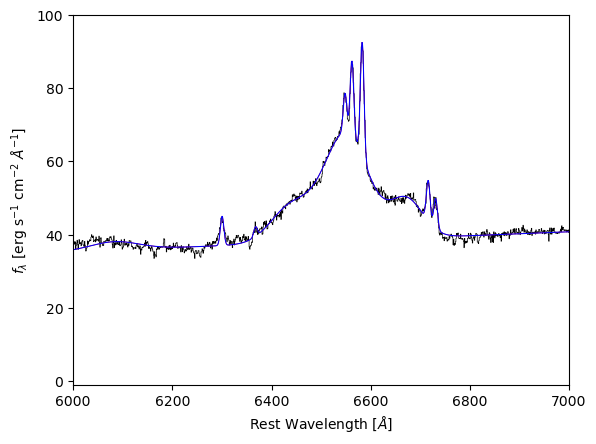

In [100]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
spec.plotter(xmin=6000,xmax=7000,ymin=-1,ymax=100,xlabel='Rest Wavelength [$\AA$]',ylabel="$f_{\lambda}$ [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]")
spec.specfit.plot_fit(annotate=False)
spec.specfit.plot_components()
plt.show()

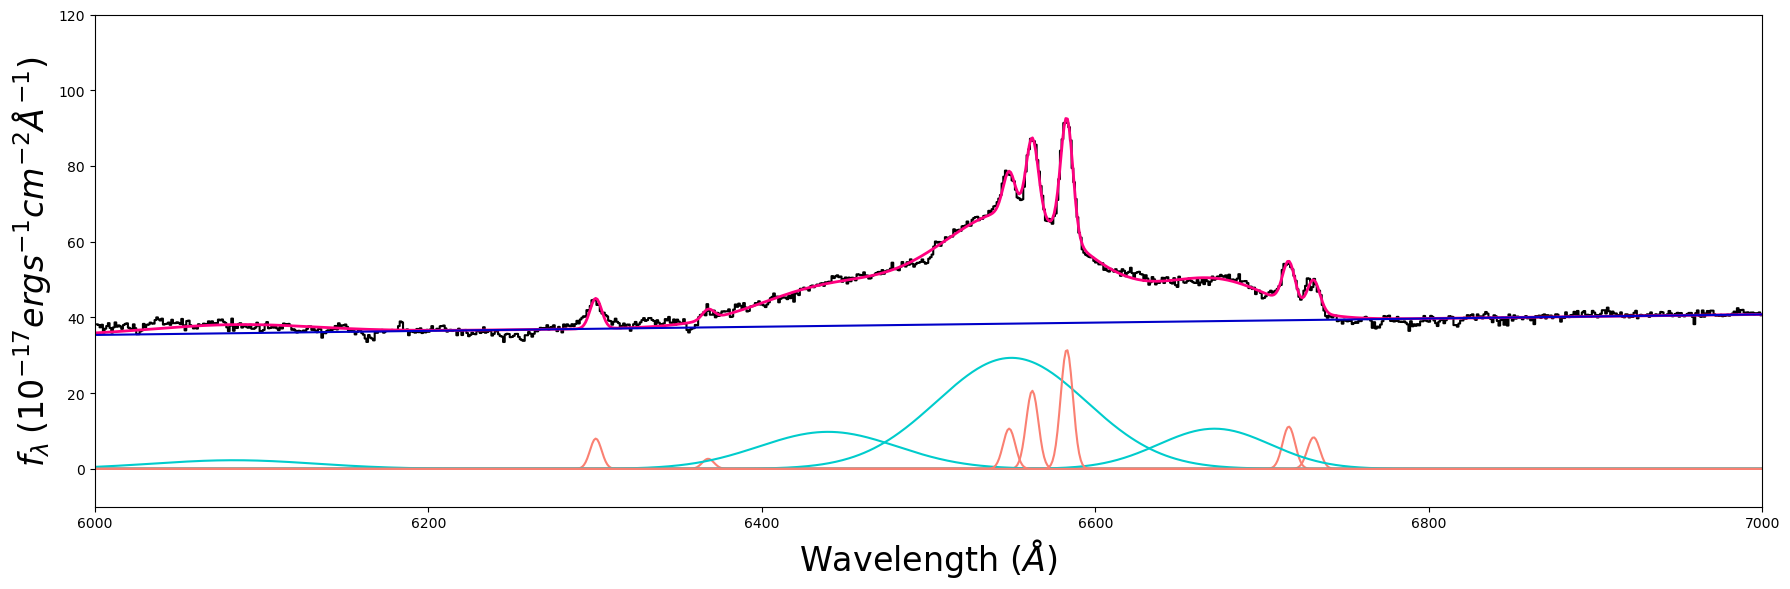

In [101]:
best_model = optical_agn_spectrum(lam,*spec.specfit.parinfo.values,return_components=True)
wavemin = 1000.
wavemax = 1650.
ymin = -100.
ymax = 400.
wave = lam
flux = flux
model = best_model
xlabel = 'Wavelength $[\AA]$'
ylabel = '$f_\lambda [10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]'
plotfile = '../plots/j0950/plots/spec-52509-0902-0498'
HARDCOPY = False
SHOW = True

plot_optical_agn_fit(lam,flux,best_model,6000,7000,-10,120,'Wavelength $(\AA)$',\
                     "$f_{\lambda} \: (10^{-17} erg s^{-1} cm^{-2} \AA^{-1})$",\
                     plotfile,HARDCOPY=False,SHOW=True)

In [ ]:
#file_name = 'bundle_20230529_standards/combined_spectrum_20230112_0000009_exp01.fits'
file_name = 'bundle_20230529_standards/spectrum_20230112_0000010_exp01_red.fits'
hdul = fits.open(file_name)
data = hdul[0].data
hdr = hdul[0].header

z = 0.081

wl = data[0]
wl = wl
flux = data[1] *(10**16)
err = data[2]

#plt.figure(figsize=(10, 4))
#plt.plot(wl, flux, label='Standard Data')  # Original data


#plt.plot(wl_fit, flux_fit-flux_o, label='Best fit curve')  # Fitted curve
#plt.xlabel('Observed Wavelength (wl)')
#plt.ylabel('Flux')
#plt.legend()
#plt.show()

wl = wl#/(1+z)
mask0 = np.where((wl>6000*(1+z)) & (wl < 7500*(1+z))) 
wl_o = wl[mask0]
flux_o = flux[mask0]
err_o = err[mask0]

mask1 = np.where((wl_o < 6015*(1+z)) | (wl_o > 6170*(1+z))) 
wl = wl_o[mask1]
flux = flux_o[mask1]
err = err_o[mask1]

mask2 = np.where((wl < 6340*(1+z)) | (wl > 6445*(1+z))) 
wl = wl[mask2]
flux = flux[mask2]
err = err[mask2]

mask3 = np.where((wl < 6455*(1+z)) | (wl > 6800*(1+z))) 
wl = wl[mask3]
flux = flux[mask3]
err = err[mask3]


mask4 = np.where((wl < 7000*(1+z)) | (wl > 7130*(1+z))) 
wl = wl[mask4]
flux = flux[mask4]
err = err[mask4]

plt.figure(figsize=(10, 6))
plt.plot(wl_o, flux_o, label='Atmospheric Absorption', color='grey')
plt.plot(wl, flux, label='Continuum', color='black')  # Original data

#plt.axvline(x=6445)
#plt.axvline(x=6455)

#plt.plot(wl_fit, flux_fit-flux_o, label='Best fit curve')  # Fitted curve
plt.xlabel('Observed Wavelength (\AA)')
plt.ylabel('$f_{\lambda}$ (10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend()

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("standard_spectra.pdf", format='pdf', dpi=300)
plt.show()